In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('dataset\Crop_recommendation.csv')

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.shape

(2200, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


### Key Insights :
- N : varience is high (~37) | Some needs enrichment of Nitrogen while some is already enriched.

- P : Varience is high (~33) | Median (51) close to mean suggests symmetric distribution |
      possibility  of exisiting Outliers as 75% sample have P lvl less than 68 and max P lvl is 145.
      Moderate phosphorus levels, but with some extremely high values.

- K : Varience is very high (~50.5) | mean and median are very close , suggest symetric distribution |
        high possibility of existng Outliers.
        Some soils are extremely rich in potassium, possible over-fertilization in some areas.

- temperature : Varience is low | most of the samples have temp between 22 - 28 |
                Suitable for a wide variety of crops, though a few very low temperatures suggest seasonal or high-altitude data.

- humidity : Varience is moderate | most of the areas have humidity between 60 - 90 | 
             Humidity is generally high, beneficial for crops which needs high humidity | 
             But there are some dry areas also.

- ph : Majority of the soils are slightly acidic 5.97 - 6.92 good for crops | 
       ph ranges between (3.5 - 9.93) so there is no anomaly(wrong) in data. |
       But there are some very acidic (<5) or very alkaline (>9) — which may require soil treatment.

 
- rainfall : Varience of rainfall across the samples is vey high (~54) | 
             There are some areas with heavy rain and very less rainfall. |
             Rainfall distribution is quite spread; dataset likely covers multiple regions (drier to wetter zones).

In [8]:
## check for missing values
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [10]:
## checking for duplicate values
df.duplicated().sum()

np.int64(0)

#### **There is no missing values || There is no duplicate sample**

In [12]:
## understanding the label col
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [18]:
size = len(df['label'].unique())
size

22

#### **There are 22 types of Crops**

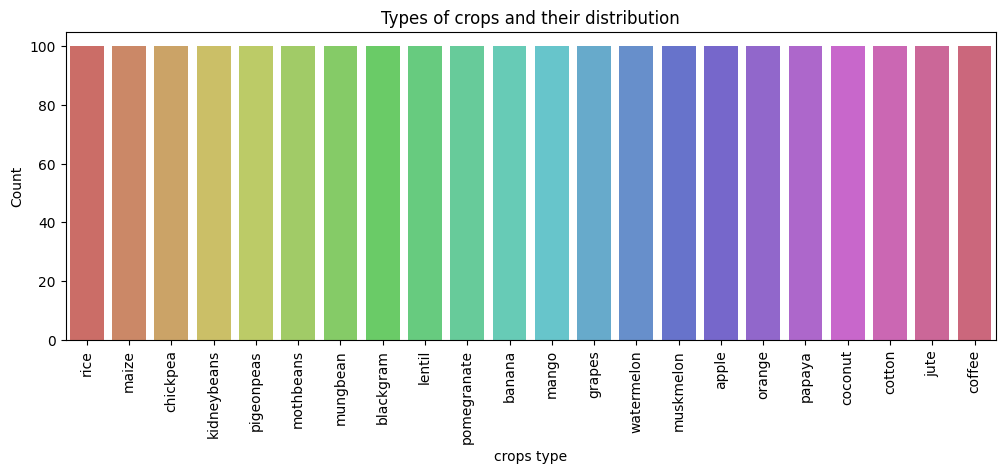

In [19]:
plt.figure(figsize=(12,4))
custom_palette = sns.color_palette('hls', size)
plt.title("Types of crops and their distribution")
sns.countplot(data= df, x = 'label',palette=custom_palette)
plt.xticks(rotation=90)
plt.xlabel('crops type')
plt.ylabel('Count')
plt.show()

#### **Dataset is Perfectly Balanced !**

#### **Univariate analysis**

In [20]:
numerical=[]
categorical=[]
for col in df.columns:
    if df[col].dtype=='O':
        categorical.append(col)
    else:
        numerical.append(col)
print("Numerical Columns : ",numerical)
print("Categorical Columns : ",categorical)

Numerical Columns :  ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
Categorical Columns :  ['label']


In [21]:
len(numerical)

7

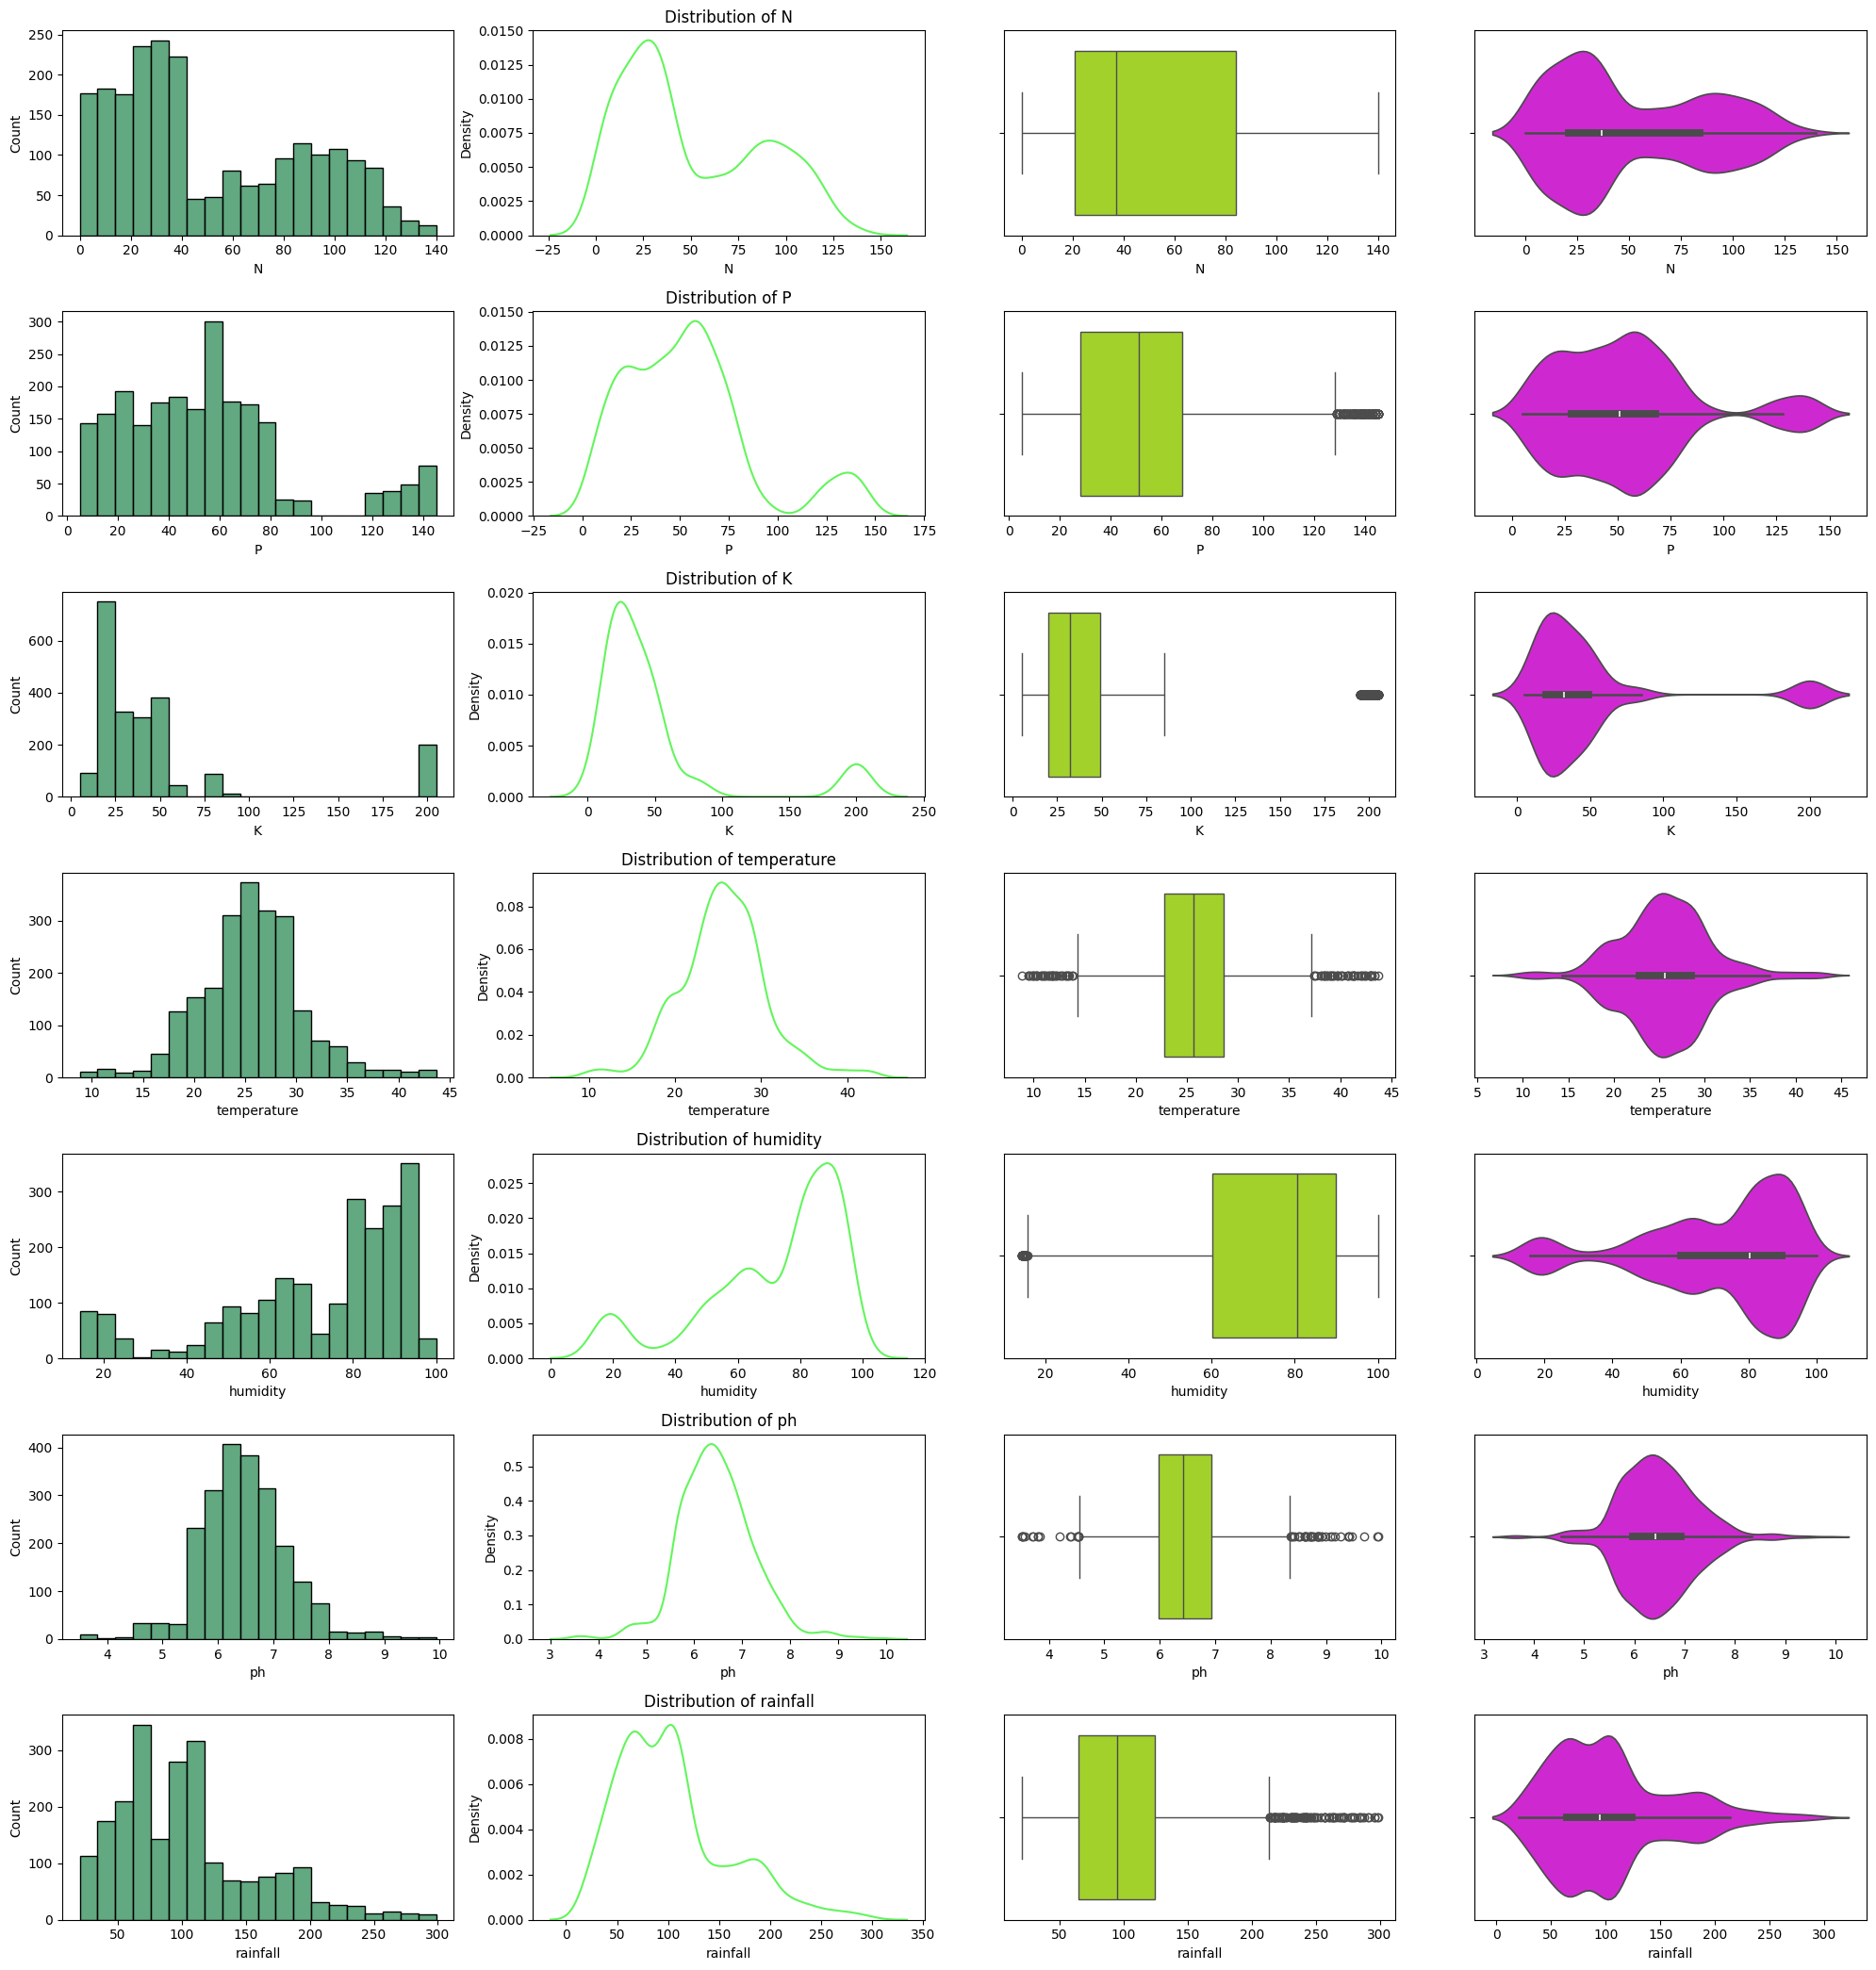

In [45]:
plt.figure(figsize=(20,21))
i=1
for col in numerical:
    plt.subplot(7,4,i)
    sns.histplot(data=df,x=col,bins=20,color='seagreen')
    i+=1

    plt.subplot(7,4,i)
    sns.kdeplot(data=df,x=col,color="#63F55C")
    i+=1

    plt.title(f'Distribution of {col}')

    plt.subplot(7,4,i)
    sns.boxplot(data=df,x=col,color="#AEEC10F5")
    i+=1

    plt.subplot(7,4,i)
    sns.violinplot(data=df,x=col,color="#E90DEDF5")
    i+=1

    plt.tight_layout() 

plt.show()
   

#### N (Nitrogen)
- Distribution: Bimodal (two peaks in KDE and histogram)

- Boxplot: Symmetric distribution with no major outliers

- Violin: Two dominant groups → might indicate clusters/classes

**Insight: Data might represent two crop types or soil zones with different nitrogen requirements.**

#### P (Phosphorus)
- Distribution: Bimodal, right-skewed

- Boxplot: Few high-value outliers

- Violin: Shows long tail on the right

**Insight: Wide range; consider normalization. Outliers may affect model performance.**

#### K (Potassium)
Distribution: Right-skewed, large spike at lower values

Boxplot: Major outlier detected

Violin: Very skewed; concentrated at low values

**Insight: Most data has low potassium levels; outliers could indicate incorrect data or edge cases.**

#### Temperature
Distribution: Bell-shaped (normal)

Boxplot/Violin: Symmetric, centered around ~25–30°C

**Insight: Well-distributed, suitable for ML models without transformation.**

#### Humidity
Distribution: Multimodal (several peaks)

Boxplot: Some outliers, especially low

Violin: Varies a lot, not symmetric

**Insight: May contain readings from different regions/seasons; consider segmentation.**

#### pH
Distribution: Nearly normal, slightly left-skewed

Boxplot: Minor outliers

**Insight: Good spread, but most values lie between 5.5–7.5 → ideal for most crops.**

#### Rainfall
Distribution: Right-skewed, many low values

Boxplot: Strong outliers

Violin: Dense at low values, long tail

**Insight: Uneven distribution suggests regions with low rainfall dominate; transformation may help.**



In [50]:
label_counts = df['label'].value_counts()
label_counts

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

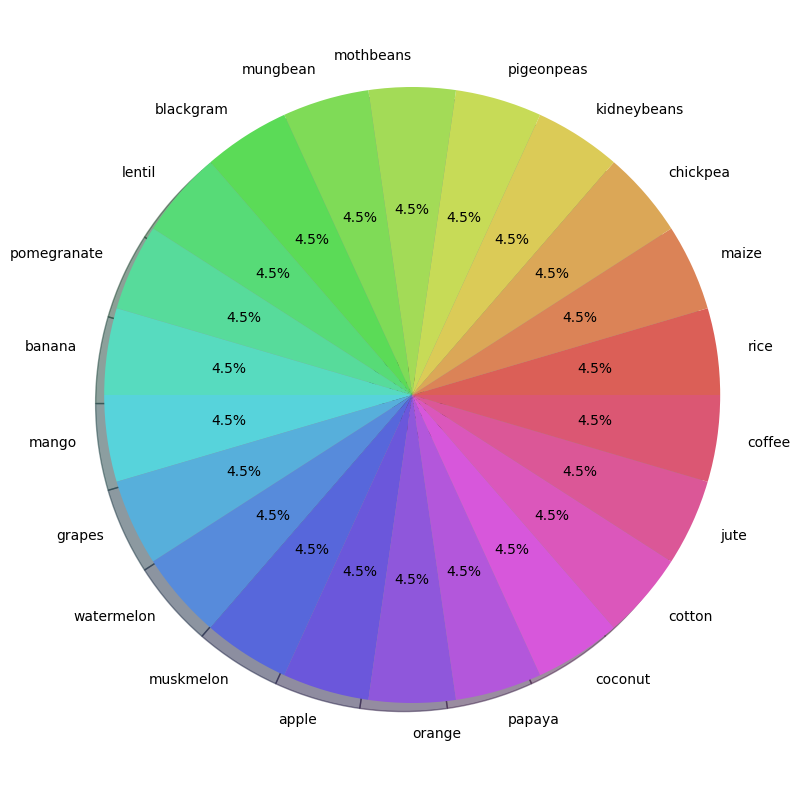

In [68]:
plt.figure(figsize=(10,10))
colors = sns.color_palette('hls',n_colors=len(label_counts))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=colors,shadow=True)
plt.show()

#### Insights:
**22 types of crops , Each are Evenly Sampled (4.5%)**

## Multivariate Analysis

In [69]:
## correlation
input_features= df.drop('label',axis=1)
input_features.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


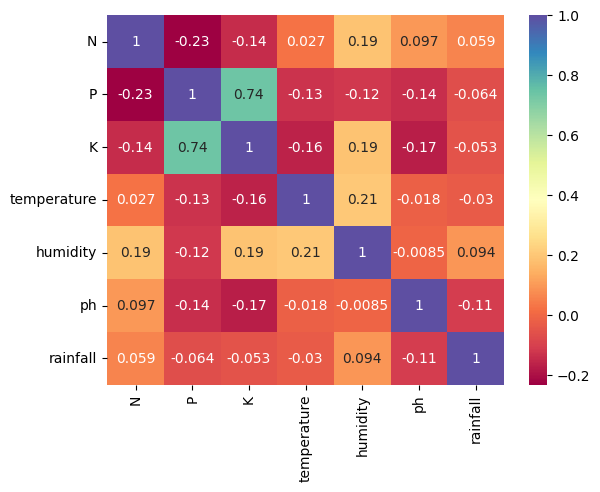

In [74]:
sns.heatmap(input_features.corr(),annot=True,cmap='Spectral')
plt.show()

#### **Insights:**
- There is no such strong corr among the ip features.
- But P and K have some good +ve corr.
- Unexpectedly the rainfall and humidity have corr nearly zero.
- There is very very less -ve corr between ph & K and ph & P.
    

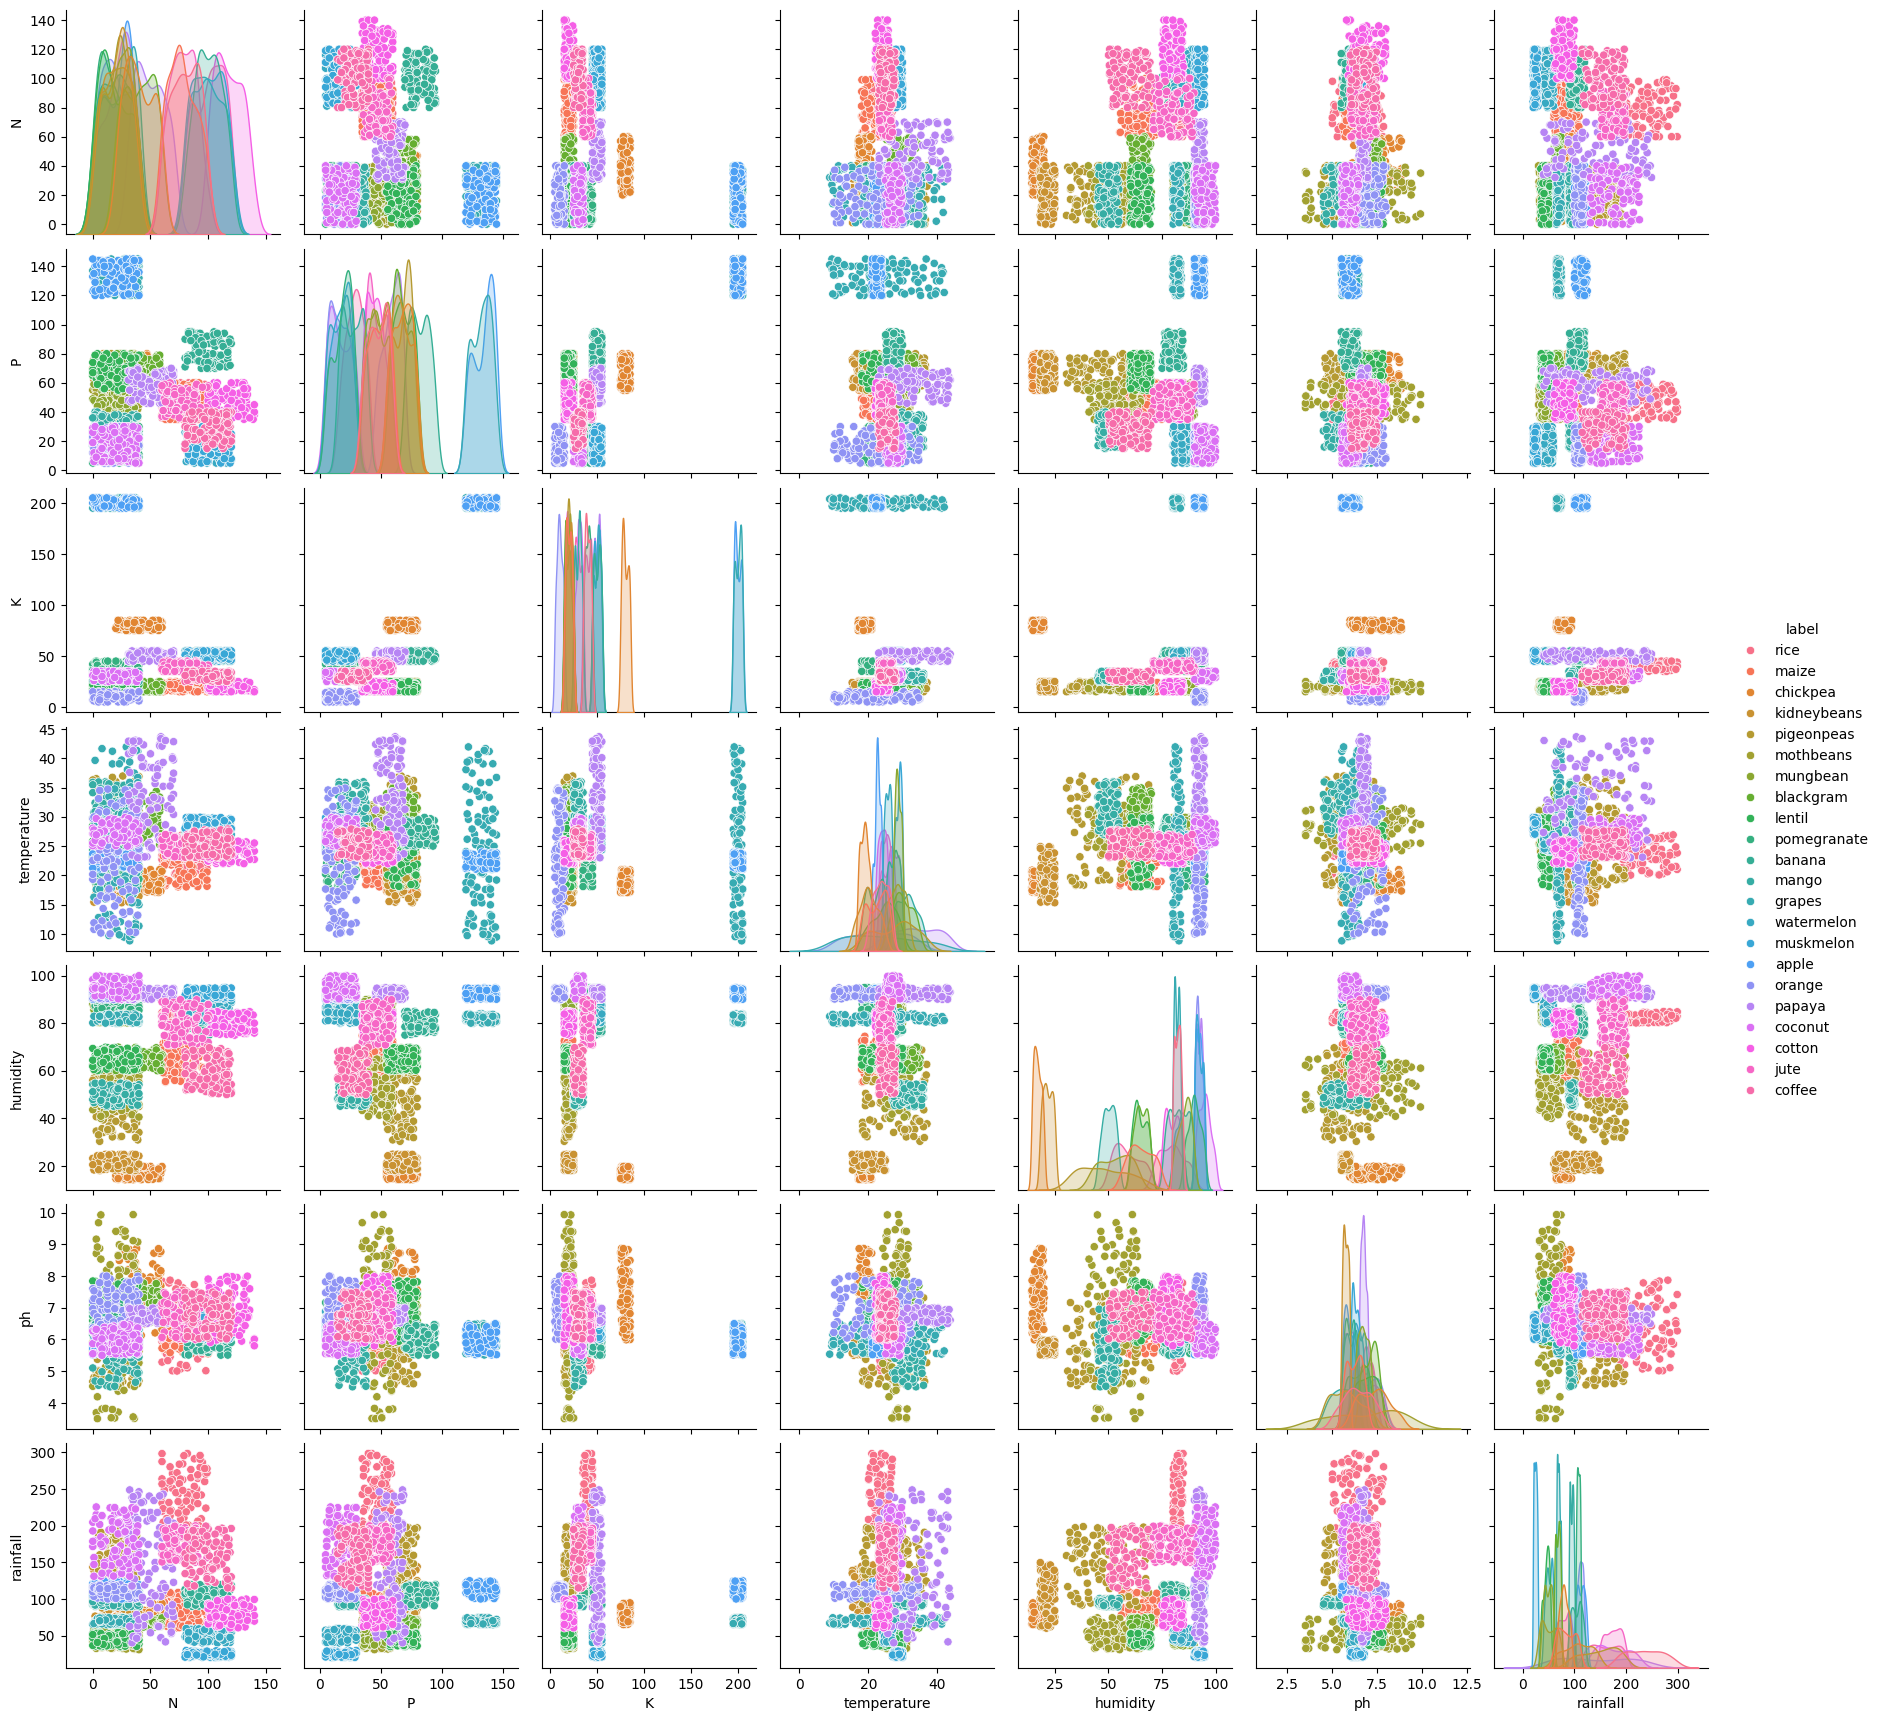

In [76]:
## pair plot
sns.pairplot(data=df,hue='label')
plt.show()

### Insights:
- there are diff types of crops which grows up diff lvl of nitrogen.

- most of the crops grows in low to high lvl of phosphorus, but there are some crop which need excessive 
  phosphorus.

- most of the crops grows in low or slightly mid lvl of potassium, but there are some crops grows in high 
  potassium lvl.

- about all crops are grown in mid to mid high temp.

- there are little no of crops grown in low humidity. but most of the crops need mid to high humidity.

- most of the crops grown in soil with very slight acidic to normal ph .

- there are crops with both low ,mid and high rainfall requirment.

#### Each feature grouped by label. 

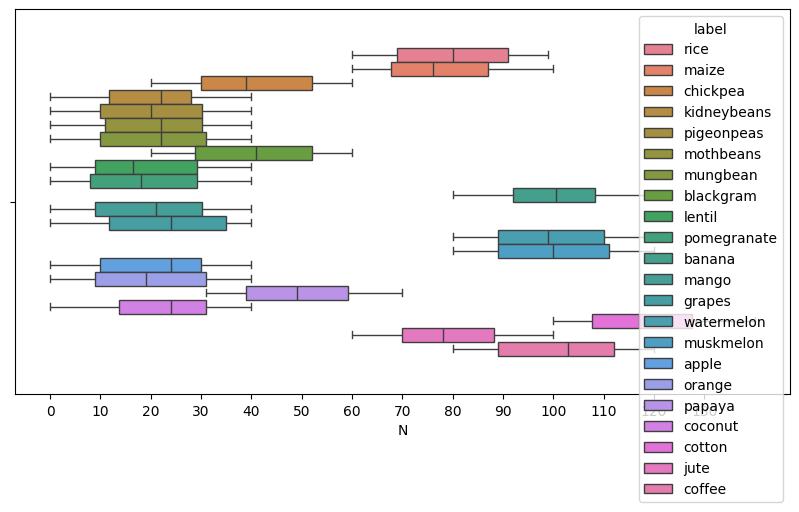

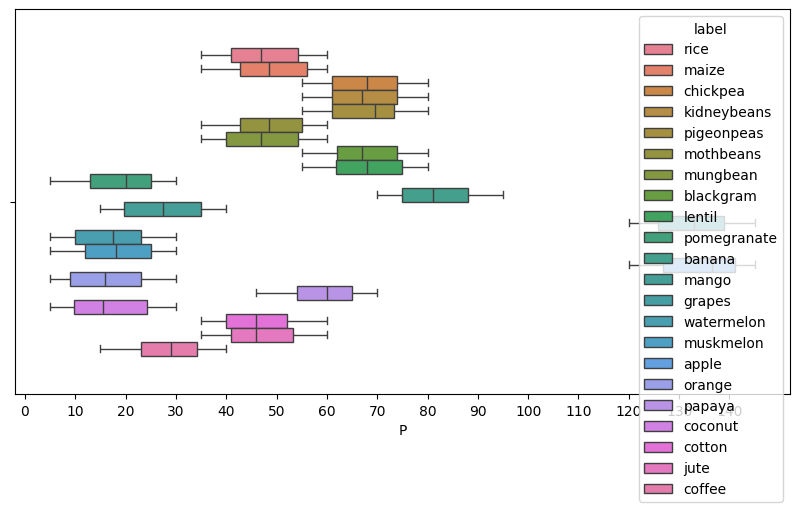

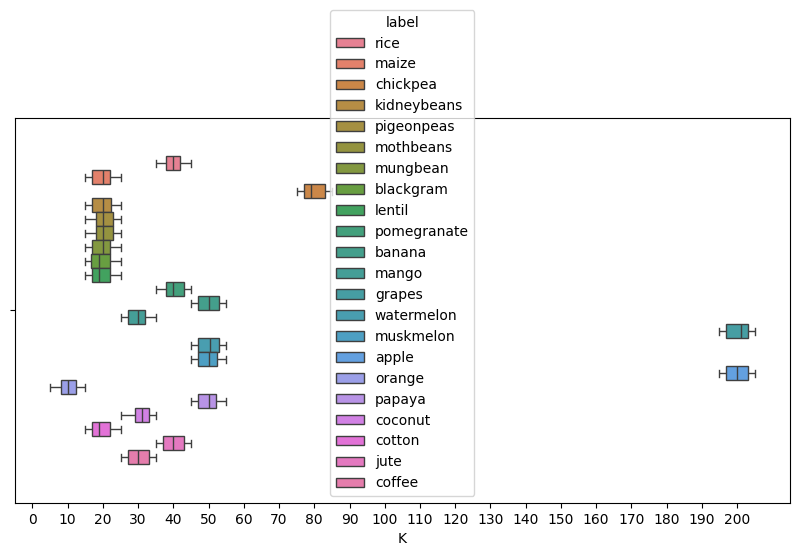

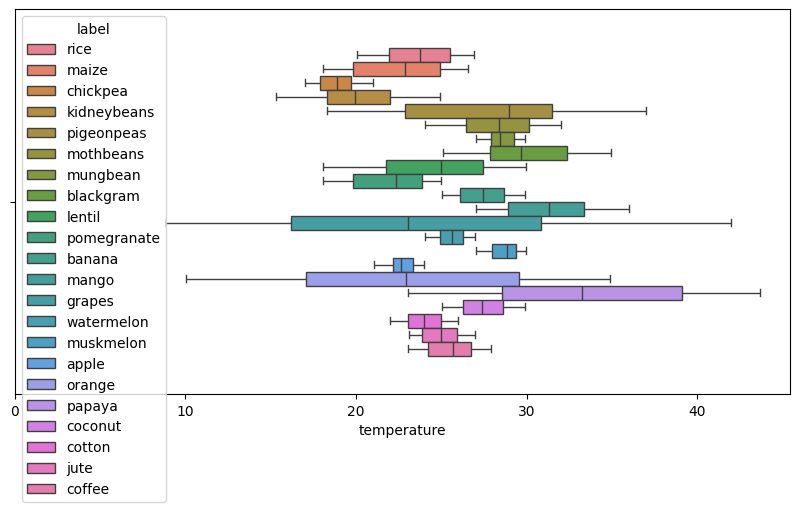

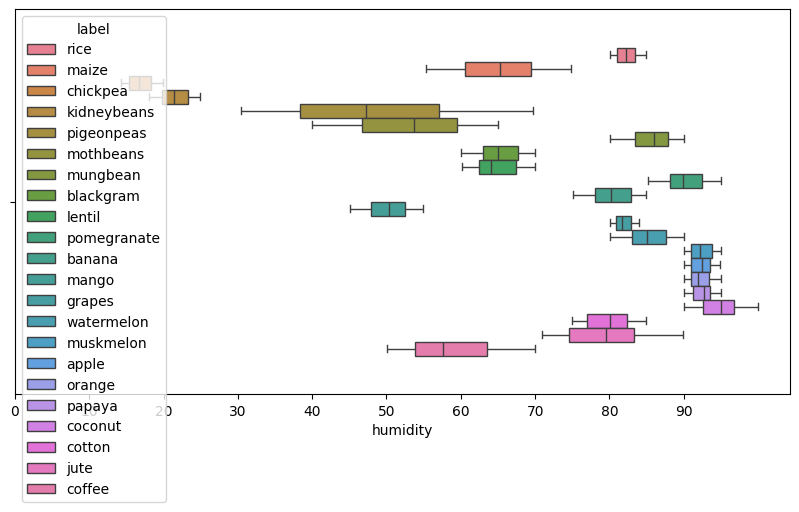

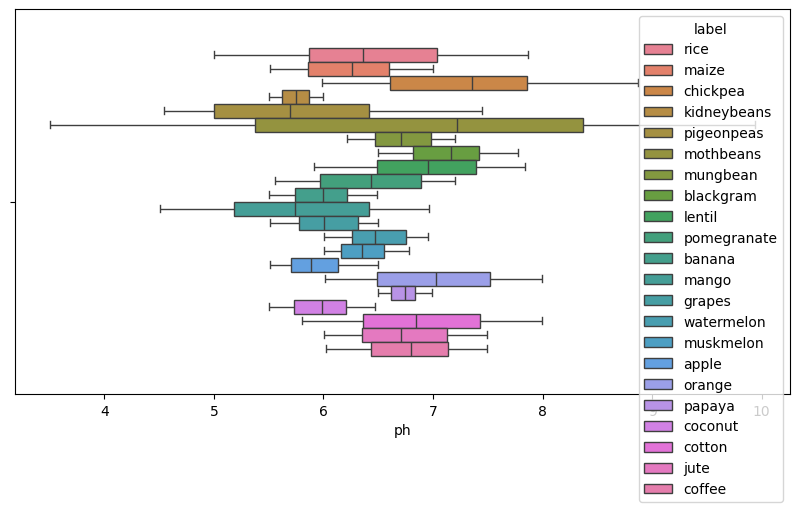

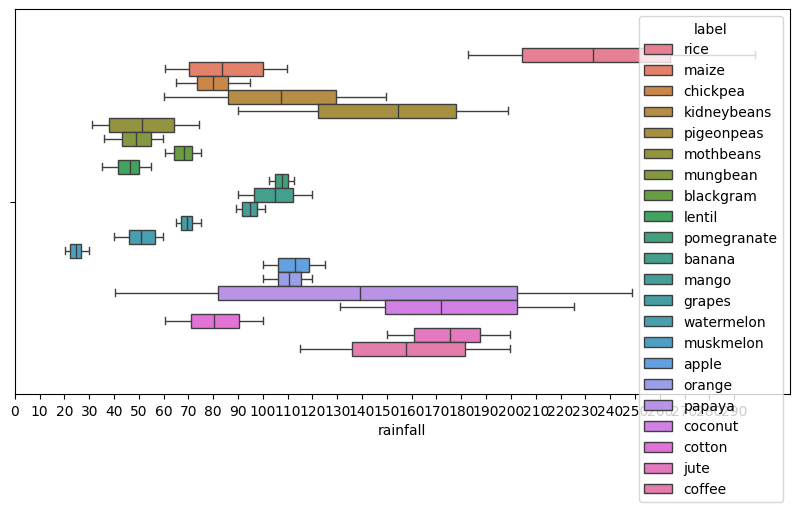

In [87]:
for col in numerical:
    max_val=df[col].max()
    min_val = min(0,df[col].min())
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df,x=col,hue='label')
    if col!='ph':
        plt.xticks(np.arange(min_val,max_val, 10))
    
    plt.show()


### Conclusion: 
- from the variation of rainfall we can say that the data is from diff diff region.

- All input features are independent with each other.

- RobustScaler or MinMaxScaler are better suited for preprocessing due to skewed distributions.

- Tree-based models work well without normalization, but models like SVM, KNN, and logistic regression 
  benefit from scaling.



#### **Model Trainning**

In [89]:
x = df.drop('label',axis=1)
y=df['label']

In [91]:
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [92]:
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [95]:
y = le.fit_transform(y)

In [98]:
y

array([20, 20, 20, ...,  5,  5,  5], shape=(2200,))

In [97]:
le.transform(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [106]:
lst = le.classes_
mapping = {item:idx for idx,item in enumerate(lst)}
mapping

{'apple': 0,
 'banana': 1,
 'blackgram': 2,
 'chickpea': 3,
 'coconut': 4,
 'coffee': 5,
 'cotton': 6,
 'grapes': 7,
 'jute': 8,
 'kidneybeans': 9,
 'lentil': 10,
 'maize': 11,
 'mango': 12,
 'mothbeans': 13,
 'mungbean': 14,
 'muskmelon': 15,
 'orange': 16,
 'papaya': 17,
 'pigeonpeas': 18,
 'pomegranate': 19,
 'rice': 20,
 'watermelon': 21}

In [99]:
from sklearn.model_selection import train_test_split


In [100]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [101]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

In [102]:
numerical

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

In [103]:
power_trans = ColumnTransformer(
    transformers=[
        ('power',PowerTransformer(method='yeo-johnson'),numerical)
    ]
)

In [107]:
x_train_trans=power_trans.fit_transform(x_train)
x_test_trans = power_trans.transform(x_test)

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [109]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [110]:
models = [
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Support Vector Classifier", SVC()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier())
]

In [112]:
for name,model in models:
    model.fit(x_train_trans,y_train)
    y_train_pred = model.predict(x_train_trans)
    train_acc = accuracy_score(y_train,y_train_pred)
    y_test_pred = model.predict(x_test_trans)
    test_acc = accuracy_score(y_test,y_test_pred)
    print(f"---------{name}---------")
    print(f"\n-- Trainning accuracy : {train_acc}")
    print(f"-- Testing accuracy : {test_acc}")
    print('\n')
    print("==================================================")
print("\n All model successfully trained...")

---------K-Nearest Neighbors---------

-- Trainning accuracy : 0.9903030303030304
-- Testing accuracy : 0.9636363636363636


---------Support Vector Classifier---------

-- Trainning accuracy : 0.9903030303030304
-- Testing accuracy : 0.9636363636363636


---------Decision Tree---------

-- Trainning accuracy : 1.0
-- Testing accuracy : 0.9854545454545455


---------Random Forest---------

-- Trainning accuracy : 1.0
-- Testing accuracy : 0.9890909090909091


---------AdaBoost---------

-- Trainning accuracy : 0.2206060606060606
-- Testing accuracy : 0.20909090909090908


---------Gradient Boosting---------

-- Trainning accuracy : 1.0
-- Testing accuracy : 0.9818181818181818



 All model successfully trained...


**All the models performs extremly well except the Adaboost.**

**going to do RandomizedSearchCV for remaining models.**

#### RandomizedSearchCV for KNN Classifier

In [115]:
from sklearn.model_selection import RandomizedSearchCV

In [114]:
params_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40, 50]
}


In [116]:
mod1 = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),param_distributions=params_knn,cv=5,scoring='accuracy',
    random_state=12,n_jobs=-1
)

In [117]:
def evalute_model(y_train,y_train_pred,y_test,y_test_pred):
    acc1 = accuracy_score(y_train,y_train_pred)
    acc2 = accuracy_score(y_test,y_test_pred)
    print(f"--Trainning Accuracy : {acc1}")
    print(f"--Testing Accuracy : {acc2}")
    print("="*30)
    

In [118]:
mod1.fit(x_train_trans,y_train)

,estimator,KNeighborsClassifier()
,param_distributions,"{'algorithm': ['auto', 'ball_tree', ...], 'leaf_size': [20, 30, ...], 'metric': ['euclidean', 'manhattan', ...], 'n_neighbors': [3, 5, ...], ...}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,12
,error_score,nan


In [120]:
mod1.best_params_

{'weights': 'distance',
 'n_neighbors': 3,
 'metric': 'minkowski',
 'leaf_size': 20,
 'algorithm': 'brute'}

In [126]:
y_train_pred1 = mod1.predict(x_train_trans)
y_test_pred1 = mod1.predict(x_test_trans)
evalute_model(y_train,y_train_pred1,y_test,y_test_pred1)

--Trainning Accuracy : 1.0
--Testing Accuracy : 0.9654545454545455


#### RandomizedSearchCV for SVC 

In [135]:
params_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # for poly kernel
}


In [136]:
mod2 = RandomizedSearchCV(
    estimator=SVC(),param_distributions=params_svc,cv=5,scoring='accuracy',
    random_state=12,n_jobs=-1
)

In [137]:
mod2.fit(x_train_trans,y_train)

,estimator,SVC()
,param_distributions,"{'C': [0.1, 1, ...], 'degree': [2, 3, ...], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf', ...]}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,12
,error_score,nan


In [138]:
mod2.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'degree': 3, 'C': 100}

In [139]:
y_train_pred2 = mod2.predict(x_train_trans)
y_test_pred2 = mod2.predict(x_test_trans)
evalute_model(y_train,y_train_pred2,y_test,y_test_pred2)

--Trainning Accuracy : 0.9975757575757576
--Testing Accuracy : 0.9763636363636363


#### RandomizedSearchCV for Decision Tree.

In [129]:
params_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5,10,15,20],
    'min_samples_split': [5,7,9,11,13],
    'min_samples_leaf': [2,3,4,5,10],
    'max_features': ['auto', 'sqrt', 'log2', None]
}


In [133]:
mod3 = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),param_distributions=params_dt,cv=5,scoring='accuracy',
    random_state=12,n_jobs=-1
)

In [134]:
mod3.fit(x_train_trans,y_train)

,estimator,DecisionTreeClassifier()
,param_distributions,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [5, 10, ...], 'max_features': ['auto', 'sqrt', ...], 'min_samples_leaf': [2, 3, ...], ...}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,12
,error_score,nan


In [140]:
mod3.best_params_

{'min_samples_split': 11,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 15,
 'criterion': 'gini'}

In [141]:
mod3.best_score_

np.float64(0.9872727272727273)

In [142]:
y_train_pred3 = mod3.predict(x_train_trans)
y_test_pred3 = mod3.predict(x_test_trans)
evalute_model(y_train,y_train_pred3,y_test,y_test_pred3)

--Trainning Accuracy : 0.996969696969697
--Testing Accuracy : 0.9781818181818182


#### RandomizedSearchCV for Random Forest Classifier

In [ ]:
params_rf = {
    'n_estimators': [50, 100, 200,500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5,10,15,20],
    'min_samples_split': [5,7,9,11,13,15],
    'min_samples_leaf': [2,3,5,7,9,11],
    'bootstrap': [True, False]
}


In [144]:
mod4 = RandomizedSearchCV(
    estimator=RandomForestClassifier(),param_distributions=params_rf,cv=5,scoring='accuracy',
    random_state=12,n_jobs=-1
)

In [145]:
mod4.fit(x_train_trans,y_train)

,estimator,RandomForestClassifier()
,param_distributions,"{'bootstrap': [True, False], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], ...}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,12
,error_score,nan


In [146]:
mod4.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 10,
 'criterion': 'entropy',
 'bootstrap': True}

In [148]:
y_train_pred4 = mod4.predict(x_train_trans)
y_test_pred4 = mod4.predict(x_test_trans)
evalute_model(y_train,y_train_pred4,y_test,y_test_pred4)

--Trainning Accuracy : 0.9987878787878788
--Testing Accuracy : 0.9872727272727273


#### RandomizedSearchCV for GradientBoosting

In [149]:
params_gb = {
    'loss': ['log_loss', 'deviance', 'exponential'],
    'n_estimators': [50, 100,200,300,500],
    'learning_rate': [0.01, 0.1, 0.2,0.5],
    'max_depth': [3, 5, 7,10,15],
    'min_samples_split': [5,7,9,11,13,15],
    'min_samples_leaf': [2,3,5,7,9,11],
    'criterion': ['friedman_mse', 'squared_error']
}


In [150]:
mod5 = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(),param_distributions=params_gb,cv=5,scoring='accuracy',
    random_state=12,n_jobs=-1,n_iter=30
)

In [151]:
mod5.fit(x_train_trans,y_train)

,estimator,GradientBoostingClassifier()
,param_distributions,"{'criterion': ['friedman_mse', 'squared_error'], 'learning_rate': [0.01, 0.1, ...], 'loss': ['log_loss', 'deviance', ...], 'max_depth': [3, 5, ...], ...}"
,n_iter,30
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,12
,error_score,nan


In [153]:
mod5.best_params_

{'n_estimators': 100,
 'min_samples_split': 9,
 'min_samples_leaf': 2,
 'max_depth': 10,
 'loss': 'log_loss',
 'learning_rate': 0.5,
 'criterion': 'friedman_mse'}

In [152]:
y_train_pred5 = mod5.predict(x_train_trans)
y_test_pred5 = mod5.predict(x_test_trans)
evalute_model(y_train,y_train_pred5,y_test,y_test_pred5)

--Trainning Accuracy : 1.0
--Testing Accuracy : 0.9763636363636363


- Decision Tree may Overfit, so Going with SVC,RandomForest and GradientBoosting